# <span style="color:Purple">Predict Bike Sharing Demand with AutoGluon Template

## <span style="color:green">Project: Predict Bike Sharing Demand with AutoGluon</span>
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## <span style="color:blue">Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## <span style="color:blue">Step 2: Download the Kaggle dataset using the kaggle python library

### <span style="color:Purple">Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### <span style="color:Purple">Install packages

In [ ]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install pydantic==1.10.3
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
  Using cached setuptools-65.6.3-py3-none-any.whl (1.2 MB)
  Using cached wheel-0.38.4-py3-none-any.whl (36 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.4.0
    Uninstalling setuptools-59.4.0:
      Successfully uninstalled setuptools-59.4.0
  Using cached pydantic-1.10.3-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
Reason for being yanked: See https://github.com/pydantic/pydantic/issues/4885
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.0.1
    Uninstalling typing_extensions-4.0.1:
      Successfully uninstalled typing_extensions-4.0.1
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
  Using cached 

### <span style="color:Purple"> Setup Kaggle API Key

In [ ]:
# Dowmload and unzip 'Bike Sharing Demand' dataset from Kaggle

# Install Kaggle API client
!pip install -q Kaggle

# Upload Kaggle API token (json file) -- (Uncomment) Only for Google Colab (For AWS Sagemaker upload 'kaggle.json')
# from google.colab import files
# files.upload()

# create a kaggle directory
!mkdir ~/.kaggle          # (-----------------------------------------   Uncomment - For first time only)

# copy 'kaggle.json' (Kaggle API Token) to the folder we have created
!cp kaggle.json ~/.kaggle/

# Authorize permissions for the json to act
!chmod 600 ~/.kaggle/kaggle.json

# Download the Bike Sharing Demand dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand

# # Unzip Dataset (Over-write to avoid error, if the dataset pre-exists)
!unzip -o bike-sharing-demand.zip    # -o: over-writes if the file pre-exists

mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 8.06MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


### <span style="color:Purple">Download and explore dataset

### <span style="color:Purple">Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [ ]:
import pandas as pd
import numpy as np
from autogluon.tabular import TabularPredictor

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv",parse_dates=["datetime"])

In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Train dataset summary
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# Information regarding datatypes of variables within the train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
# Check for null values in train data
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

**Observations:**<br>No missing values in the train dataset.

In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv",parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Check for null values in test data
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

**Observation:**<br>No missing values in the test dataset.

In [ ]:
# Shape of train and test datasets
print("Train Dataset Shape : ", train.shape)
print("Test Dataset Shape  : ", test.shape)

Train Dataset Shape :  (10886, 12)
Test Dataset Shape  :  (6493, 9)


**Observation:**<br>
Number of total columns/features in the test dataset are not same as that of train dataset. Some features are absent in the test dataset.

In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv",parse_dates=["datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
# Checking all the features and target variable in the dataset
print("Columns in Train Dataset:\n", train.columns)
print("\nColumns in Test Dataset:\n", test.columns)

Columns in Train Dataset:
 Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

Columns in Test Dataset:
 Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')


In [ ]:
# Variables not present in test dataset
print("Variables that are not present in the test dataset: ")
list(set(train.columns).difference(set(test.columns)))

Variables that are not present in the test dataset: 


['registered', 'count', 'casual']

**Observation:**<br>Since, 'count' is the predicted/dependent variable whereas 'casual' and 'registered' are independent variables which aren't present in the test dataset, hence, ignoring these two predictor variables/columns from the train dataset.

### <span style="color:Purple">Data Fields (Data Dictionary)

`datetime` - hourly date + timestamp <br>
`season` -  1 = spring, 2 = summer, 3 = fall, 4 = winter <br>
`holiday` - whether the day is considered a holiday<br>
`workingday` - whether the day is neither a weekend nor holiday<br>
`weather` -
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br>

`temp` - temperature in Celsius<br>
`atemp` - "feels like" temperature in Celsius<br>
`humidity` - relative humidity<br>
`windspeed` - wind speed<br>
`casual` - number of non-registered user rentals initiated **(ignore, since absent in test data)**<br>
`registered` - number of registered user rentals initiated **(ignore, since absent in test data)**<br>
`count` - number of total rentals<br>

## <span style="color:blue">Step 3: Train a model using AutoGluon’s Tabular Prediction

**Requirements:**
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
# Requirements: For AutoGluon's Tabular Predictions
eval_metric = 'root_mean_squared_error'
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 60*10 = 600 seconds
presets = "best_quality"                     # auto_stack=True

In [ ]:
predictor = TabularPredictor(label=label,
                             problem_type= 'regression',
                             eval_metric=eval_metric,
                             learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                           train_data = train_data,
                                                                           time_limit=time_limit,
                                                                           presets=presets)

No path specified. Models will be saved in: "AutogluonModels/ag-20230101_021204/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230101_021204/"
AutoGluon Version:  0.6.1
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3052.31 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features

### <span style="color:Purple">Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
# # Uncomment to load a previously trained model

# predictor = TabularPredictor.load("AutogluonModels/ag-20230101_021204/")

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -52.556431       2.419883  39.917432                0.001174           0.196789            3       True          8
1    ExtraTreesMSE_BAG_L2  -53.157140       1.832597  21.456854                0.572866           6.663340            2       True          7
2  RandomForestMSE_BAG_L2  -53.220266       1.845843  33.057302                0.586112          18.263788            2       True          6
3   KNeighborsDist_BAG_L1  -84.125061       0.103834   0.035690                0.103834           0.035690            1       True          2
4     WeightedEnsemble_L2  -84.125061       0.104570   0.317315                0.000736           0.281625            2       True          5
5   KNeighborsUnif_BAG_L1 -101.546199       0.104354   0.037143                0.10435

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'RandomForestMSE_BAG_L1': -116.54429428704391,
  'ExtraTreesMSE_BAG_L1': -124.58805258915959,
  'WeightedEnsemble_L2': -84.12506123181602,
  'RandomForestMSE_BAG_L2': -53.22026566077818,
  'ExtraTreesMSE_BAG_L2': -53.157139677682935,
  'WeightedEnsemble_L3': -52.55643086621058},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'KNeighborsUnif_BAG_L1': 'AutogluonModels/ag-20230101_021204/models/KNeighborsUnif_BAG_L1/',
  'KNeighbor

In [ ]:
# Leaderboard dataframe
leaderboard_df = pd.DataFrame(predictor.leaderboard(silent=True))
leaderboard_df

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-52.556431,2.419883,39.917432,0.001174,0.196789,3,True,8
1,ExtraTreesMSE_BAG_L2,-53.157140,1.832597,21.456854,0.572866,6.663340,2,True,7
2,RandomForestMSE_BAG_L2,-53.220266,1.845843,33.057302,0.586112,18.263788,2,True,6
3,KNeighborsDist_BAG_L1,-84.125061,0.103834,0.035690,0.103834,0.035690,1,True,2
4,WeightedEnsemble_L2,-84.125061,0.104570,0.317315,0.000736,0.281625,2,True,5
5,KNeighborsUnif_BAG_L1,-101.546199,0.104354,0.037143,0.104354,0.037143,1,True,1
6,RandomForestMSE_BAG_L1,-116.544294,0.535110,10.029948,0.535110,10.029948,1,True,3
7,ExtraTreesMSE_BAG_L1,-124.588053,0.516433,4.690732,0.516433,4.690732,1,True,4


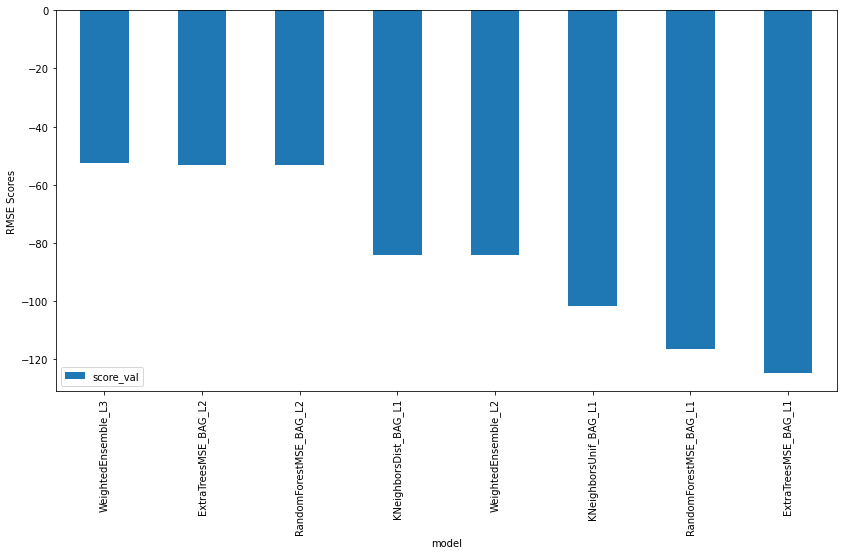

In [ ]:
# Output the model's `score_val` in a bar chart to compare performance
import matplotlib.pyplot as plt
leaderboard_df.plot(kind="bar", x="model", y="score_val", figsize=(14, 7))
plt.ylabel("RMSE Scores")
plt.show()

### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)
predictions.head()

0    22.213421
1    40.962395
2    44.579826
3    47.908035
4    51.491283
Name: count, dtype: float32

#### <span style="color:Purple">NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean       99.999901
std        90.366615
min         2.169402
25%        18.610256
50%        63.247437
75%       169.233765
max       361.222229
Name: count, dtype: float64

**Observations:**<br>Since the minimum value in predictions series is *2.169*, we can safely say that there are *no negative values* in the predictions.

In [ ]:
# How many negative values do we have?

# Rechecking the predictions
negative_pred_count = predictions.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6493
Total negative prediction values : 0


**Observation:**<br>No negative values (i.e. zero negative values) in the predictions.

In [ ]:
# Set them to zero
predictions[predictions<0] = 0    # (In case, if negative values exist in the predictions, set them to 0)

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


**Observation:**<br>No need to set them to zero as no negative values are present in the predictions.

### <span style="color:Purple">Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 392kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 3

fileName                     date                 description                             status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------  --------  -----------  ------------  
submission.csv               2023-01-01 02:13:14  first raw submission                    complete  1.84484      1.84484       
tail: write error: Broken pipe


#### Initial score of `1.84484`

## <span style="color:blue">Step 4: Exploratory Data Analysis and Creating an additional feature</span>
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

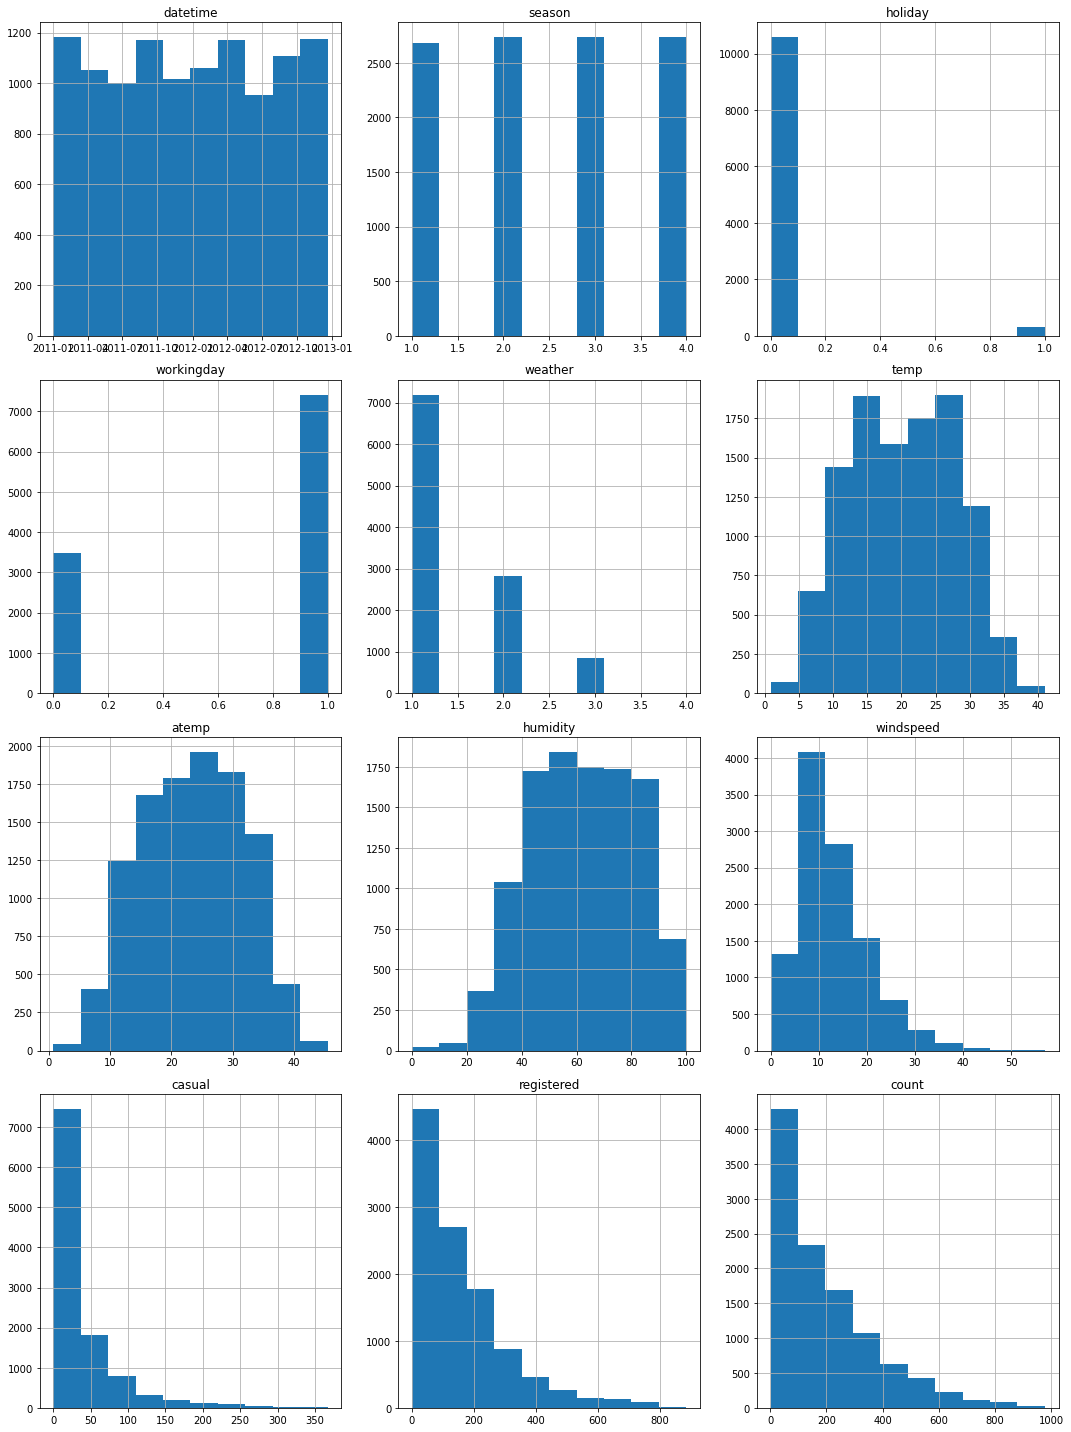

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(15,20))  # Note: 'casual' and 'registered' are ignored during training as they are absent in test data

plt.tight_layout()
plt.show()

**Observations:**<br>
1. Features like `season` and `weather` are categorical variables and it is evident from the above plot.
2. `Bike rental counts` for feature `season` intuitively makes sense as the *counts are highest for 0: Spring season* and the *lowest for 3: Winter season*. These `counts decrease as seasons change from Spring -> Summer -> Fall -> Winter`.
3. Predictors like `holiday` and `workingday` are one-hot encoded columns with values 0 and 1. Highest `rental counts` are noticed during non-holidays whereas more `rental counts` are encountered during working days.
4. `datetime` histogram illustrates datetime feature, showing randomness as they represent timestamps
5. Plots of predictor features like `temp`, `atemp`, `humidity` and `windspeed` depicts normal distribution. `windspeed` shows a slightly 'positively-skewed distribution'.
6. `casual` and `registered` independent feature histogram plots are ignored as they are invalid for our analysis, since they are absent in the test dataset.

#### <span style="color:Purple">Plot Heatmap using Correlation Matrix

<Figure size 1800x1800 with 0 Axes>

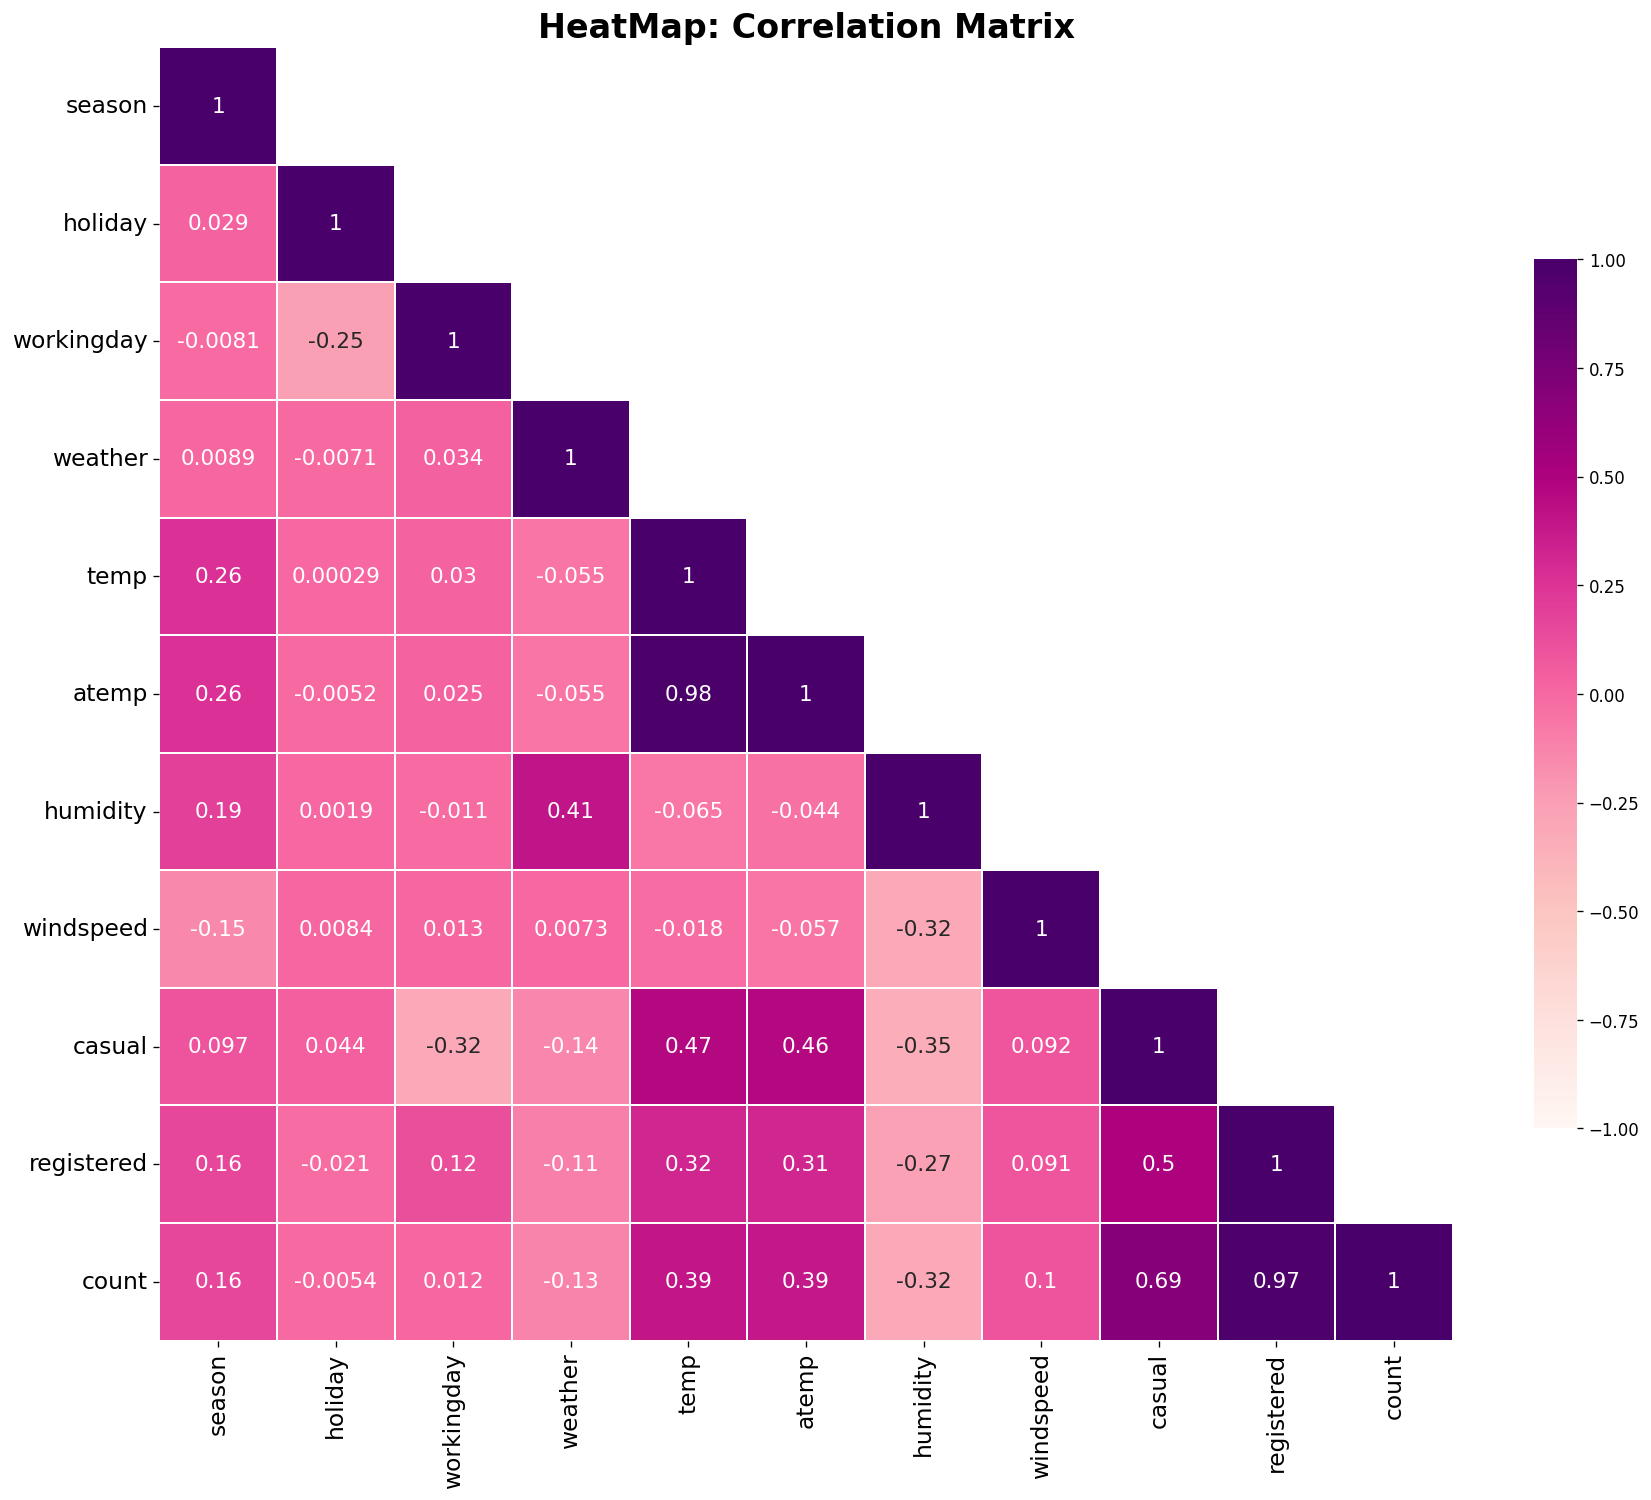

In [ ]:
## Let's check the correlation between these variables to see if there is pattern between variables

#Plotting a heatmap to understand the correlation between the independent variables
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,15), dpi=120)
corr_data = train.copy()

corr_matrix = corr_data.corr()
f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=120)
# Create a mask to eliminate redundant repetitive correlations
corr_mask = np.array(corr_matrix)
corr_mask[np.tril_indices_from(corr_mask)] = False

# Plot heatmap using correlation matrix and mask
ax_corr1 = sns.heatmap(corr_matrix, cmap= 'RdPu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, mask=corr_mask, annot=True, linewidths=0.01, annot_kws={"size":13})
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)
plt.title("HeatMap: Correlation Matrix", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.autoscale()
plt.show()

**Observations:**
1. Independent features `temp` (real-time temperature in Celsius) and `atemp` ('feels like' temperature in Celsius) are highly correlated with a positive correlation of 0.98; but these features also collectively affect the bike counts.
2. `casual` and `registered` are also highly correlated to the target variable `count` but they are ignored while training as these variables are absent in the test data.
3. `Holiday` and `working day` show least correlation with 'bike rental counts'
4. `weather` and `humidity` is slight negatively correlated with the decision of people deciding to take bike rentals and it intuitively makes sense.

### <span style="color:Purple">Creating New Features

In [ ]:
# Checking 'datetime' feature in train data
train['datetime'].head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

**Observation:**<br>`Variation` is seen on `hourly basis`. So `splitting the 'datetime'` feature into `year`, `month`, `day` *(dayofweek)* and `hour` respectively.

In [ ]:
# Splitting the 'datetime' feature in train data
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.dayofweek  # Note: day -> dayofweek (0->Monday, 6->Sunday)
train["hour"] = train["datetime"].dt.hour
train.drop(["datetime"], axis=1, inplace=True)     # Drop 'datetime' feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


In [ ]:
# Splitting the 'datetime' feature in test data
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.dayofweek  # Note: day -> dayofweek (0->Monday, 6->Sunday)
test["hour"] = test["datetime"].dt.hour
test.drop(["datetime"], axis=1, inplace=True)   # Drop 'datetime' feature
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,4


### <span style="color:Purple">Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
# Recheck datatype of features in the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  int64  
 12  month       10886 non-null  int64  
 13  day         10886 non-null  int64  
 14  hour        10886 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 1.2 MB


In [ ]:
# Convert 'int' feature columns that are categorical in nature to 'category' type
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")

test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [ ]:
# View the new features
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


In [ ]:
# Recheck datatypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  int64   
 2   workingday  10886 non-null  int64   
 3   weather     10886 non-null  category
 4   temp        10886 non-null  float64 
 5   atemp       10886 non-null  float64 
 6   humidity    10886 non-null  int64   
 7   windspeed   10886 non-null  float64 
 8   casual      10886 non-null  int64   
 9   registered  10886 non-null  int64   
 10  count       10886 non-null  int64   
 11  year        10886 non-null  int64   
 12  month       10886 non-null  int64   
 13  day         10886 non-null  int64   
 14  hour        10886 non-null  int64   
dtypes: category(2), float64(3), int64(10)
memory usage: 1.1 MB


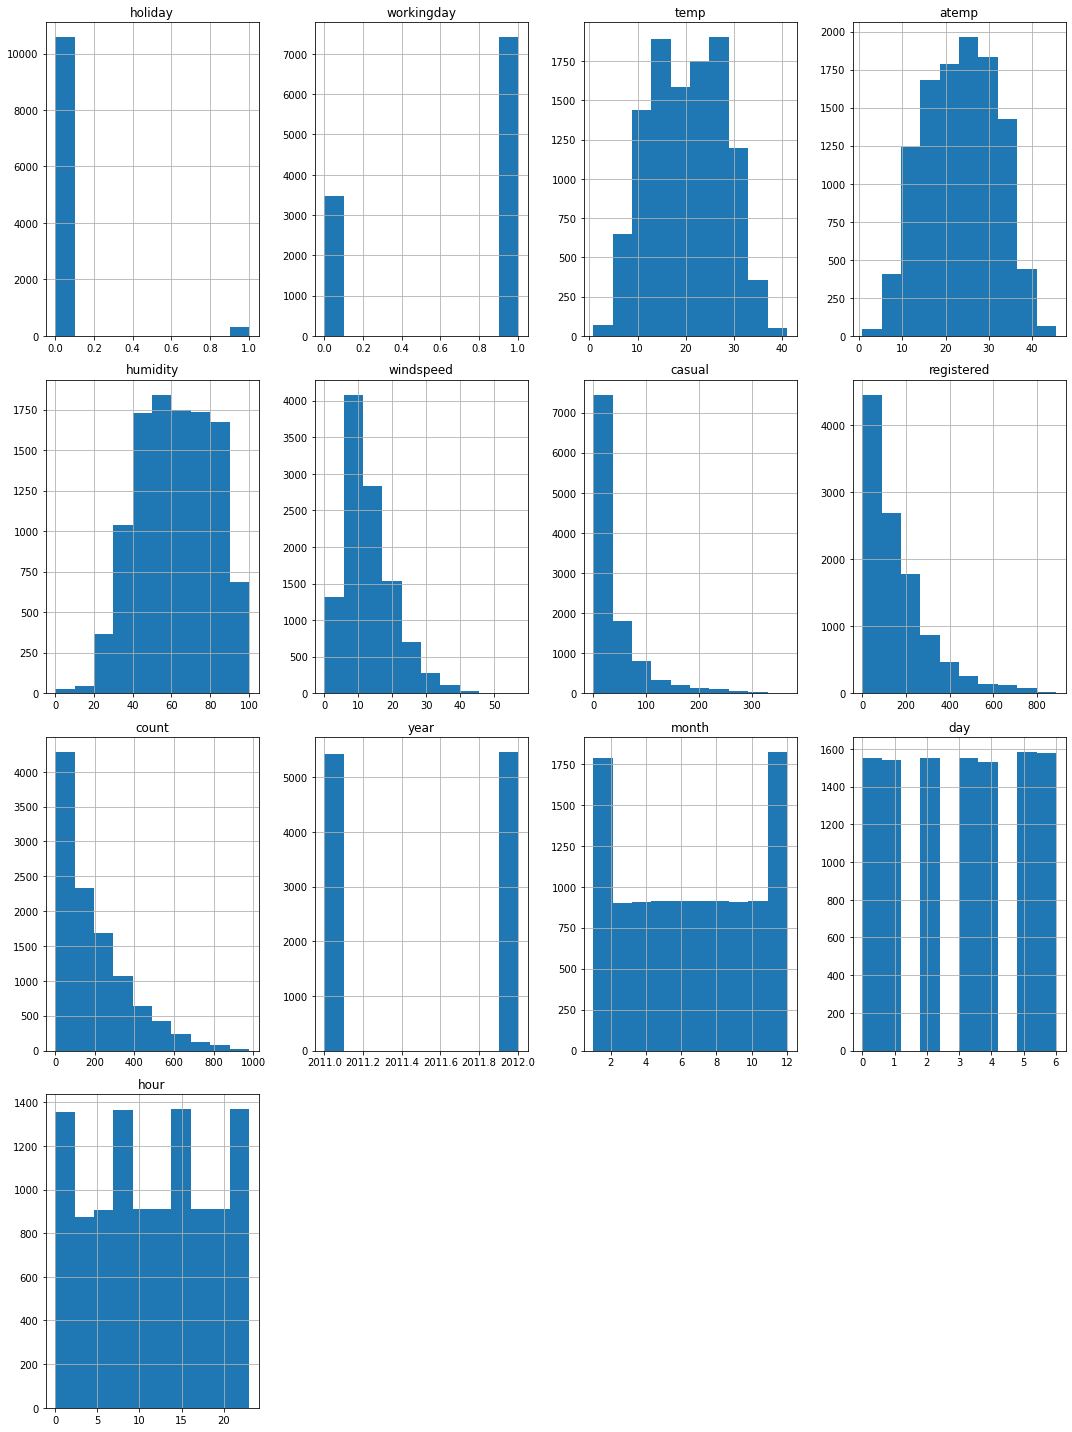

In [ ]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15,20))  # Note: 'casual' and 'registered' are ignored during training as they are absent in test data

plt.tight_layout()
plt.show()

#### <span style="color:Purple">Variation in target variable `count` with respect to new features derived from `datetime` feature

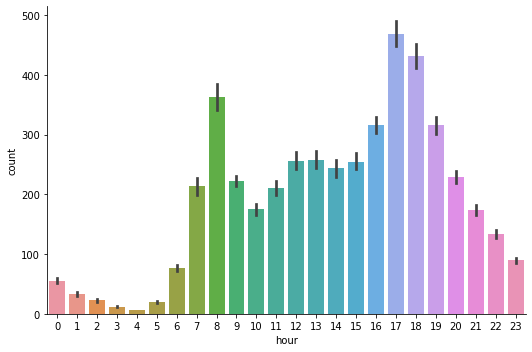

In [ ]:
# Variation in`count` w.r.t `hour`

# Using catplot: 'kind':bar makes sure to take value of 'count' for every record into account
sns.catplot(x="hour",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.tight_layout()
plt.show()

**Observations:**<br>
Frequency of Bike Rides (Hourly-basis):<br>

- `High     `: From 7-9 (7am - 9am) and 16-19 (4pm - 7pm)<br>
- `Moderate `: 10-15 (10am - 3pm)<br>
- `Low      `: 0-6 (12am - 6am) and 20-24 (8pm - 12am)<br>

1. This makes sense as most `people who rent these bikes could potentially be young college students or working professionals`, who actively `commute` via some means of transport `during peak hours` of the day mentioned under the `High` category.
2. Since bike rental is one of the `cheapest option`, this could be the `reason for the indicated surge in rental counts during peak hours` of the day.

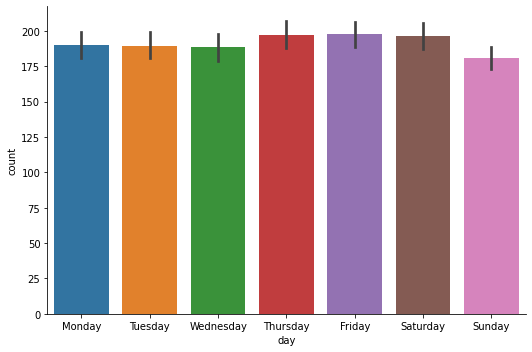

In [ ]:
# Variation in`count` w.r.t `day` (dayofweek) [0: Monday -> 6: Sunday]

# Using catplot: 'kind':bar makes sure to take value of 'count' for every record into account
sns.catplot(x="day",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.tight_layout()
plt.xticks(ticks=range(0,7), labels=["Monday", "Tuesday", "Wednesday",
                                     "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()

**Observation:**<br>
1. Not much variation or pattern is seen in the bike rental counts with respect to feature`day`.
2. `However, the demand for bike rentals seem to be slightly more on Thursdays, Fridays and Saturdays`

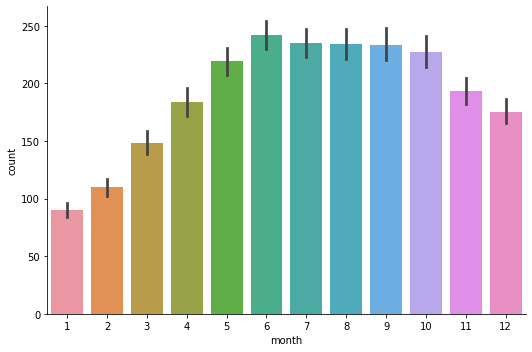

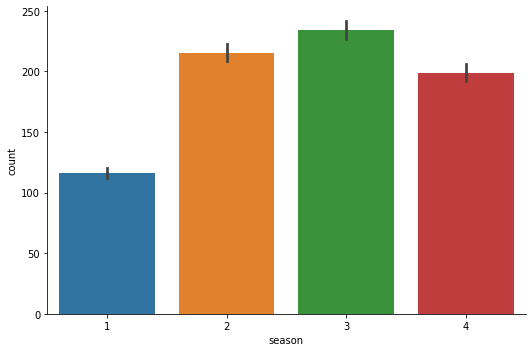

In [ ]:
# Variation in`count` w.r.t `month` and 'season'

# Using catplot: 'kind':bar makes sure to take value of 'count' for every record into account
sns.catplot(x="month",y="count",data=train,kind='bar',height=5,aspect=1.5)
sns.catplot(x="season",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.tight_layout()
plt.show()

**Observation:**<br>
Since seasons show variation in the number of bike rentals count, it is obvious to notice the same from the `month` feature, but at a slightly more granular level.

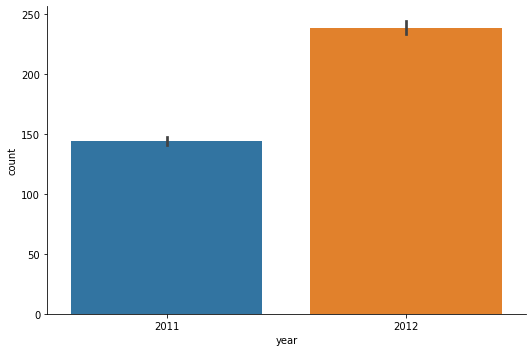

In [ ]:
# Variation in`count` w.r.t `year`

# Using catplot: 'kind':bar makes sure to take value of 'count' for every record into account
sns.catplot(x="year",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.tight_layout()
plt.show()

**Observation:**<br>
Year `2012` has higher bike demand as compared to `2011`.

#### <span style="color:Purple">Changes in bike rental `count` with respect to cateogrical feature `weather`

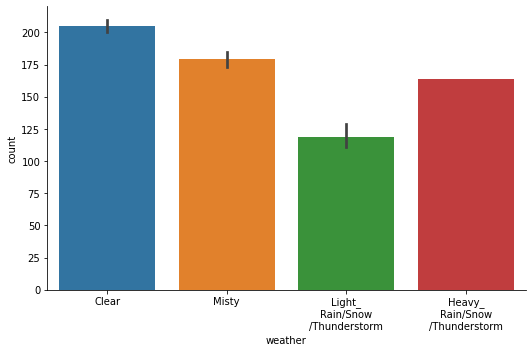

In [ ]:
# Variation in`count` w.r.t `weather'

# Using catplot: 'kind':bar makes sure to take value of 'count' for every record into account
sns.catplot(x="weather",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.xticks(ticks=range(0,4), labels=["Clear","Misty",
                                     "Light_\nRain/Snow\n/Thunderstorm",
                                     "Heavy_\nRain/Snow\n/Thunderstorm"])
plt.tight_layout()
plt.show()

**Observation:**<br>
`Bike rental counts` are **highest** in `Clear` weather, followed by `Misty` weather.

### <span style="color:Purple">Creating a new feature 'day_type'
We know that in the given data,
- `holiday` - whether the day is considered a holiday (0: Non-holiday, 1: Holiday)
- `workingday` - whether the day is neither a weekend nor holiday (0: Can-be-a-weekend-or-holiday, 1: No-weekend-No-holiday)

In [ ]:
# New feature 'day_type' contains categories 'weekend', 'weekday', or 'holiday' (In Train and Test set)

# Adding features - 'day_type' in train data
train["day_type"]=""
train.loc[(train.holiday==1),"day_type"] = "holiday"
train.loc[((train.holiday==0) & (train.workingday==1)), "day_type"] = "weekday"
train.loc[((train.holiday==0) & (train.workingday==0)), "day_type"] = "weekend"

# Adding features - 'day_type' in test data
test["day_type"]=""
test.loc[(test.holiday==1),"day_type"] = "holiday"
test.loc[((test.holiday==0) & (test.workingday==1)), "day_type"] = "weekday"
test.loc[((test.holiday==0) & (test.workingday==0)), "day_type"] = "weekend"

# Change the datatype to category
train["day_type"] = train["day_type"].astype("category")
test["day_type"] = test["day_type"].astype("category")

train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,day_type
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0,weekend
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1,weekend
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2,weekend
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3,weekend
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4,weekend


**Observation:**<br>
New categorical feature `day_type` added with the following categories.
- 'holiday': when `holiday` is set to 1
- 'weekday': when `holiday` is set to 0 and `workingday` is set to 1
- 'weekend': when `holiday` is set to 0 and `workingday` is set to 0

In [ ]:
# Statistics of all features within the trian data
train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
count,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,0.680875,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,3.013963,11.541613
std,0.166599,0.466159,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,2.004585,6.915838
min,0.000000,0.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,1.000000,6.000000
50%,0.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,3.000000,12.000000
75%,0.000000,1.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,5.000000,18.000000
max,1.000000,1.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,6.000000,23.000000


**Observations:**<br>
1. All the other aforementioned features have similar nature in the plots
2. New feature `year` shows that the historical data is for years `2011` and `2012` respectively.
3. `Historical data` of `all 12 months within a year` is considered in this train dataset.
4. Days from `(at the earliest - 1st) to (at the maximum - 19th)` of every month are taken into account in the train dataset
5. `Hourly information` of all busy hours within `24 hours of a day` is mentioned in this dataset

In [ ]:
# Dropping highly correlated independent feature 'atemp' from train and test datasets
train.drop(["atemp"], axis=1, inplace=True)
test.drop(["atemp"], axis=1, inplace=True)

In [ ]:
# Checking datatypes of variables
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  int64   
 2   workingday  10886 non-null  int64   
 3   weather     10886 non-null  category
 4   temp        10886 non-null  float64 
 5   humidity    10886 non-null  int64   
 6   windspeed   10886 non-null  float64 
 7   casual      10886 non-null  int64   
 8   registered  10886 non-null  int64   
 9   count       10886 non-null  int64   
 10  year        10886 non-null  int64   
 11  month       10886 non-null  int64   
 12  day         10886 non-null  int64   
 13  hour        10886 non-null  int64   
 14  day_type    10886 non-null  category
dtypes: category(3), float64(2), int64(10)
memory usage: 1.0 MB


In [ ]:
print("(After EDA + Feature Engineering) Train Data Shape : ", train.shape)
print("(After EDA + Feature Engineering) Test Data Shape  : ", test.shape)

(After EDA + Feature Engineering) Train Data Shape :  (10886, 15)
(After EDA + Feature Engineering) Test Data Shape  :  (6493, 12)


#### <span style="color:Purple">Plot Heatmap: Correlaton Matrix (For Numeric Variables)

<Figure size 1800x1800 with 0 Axes>

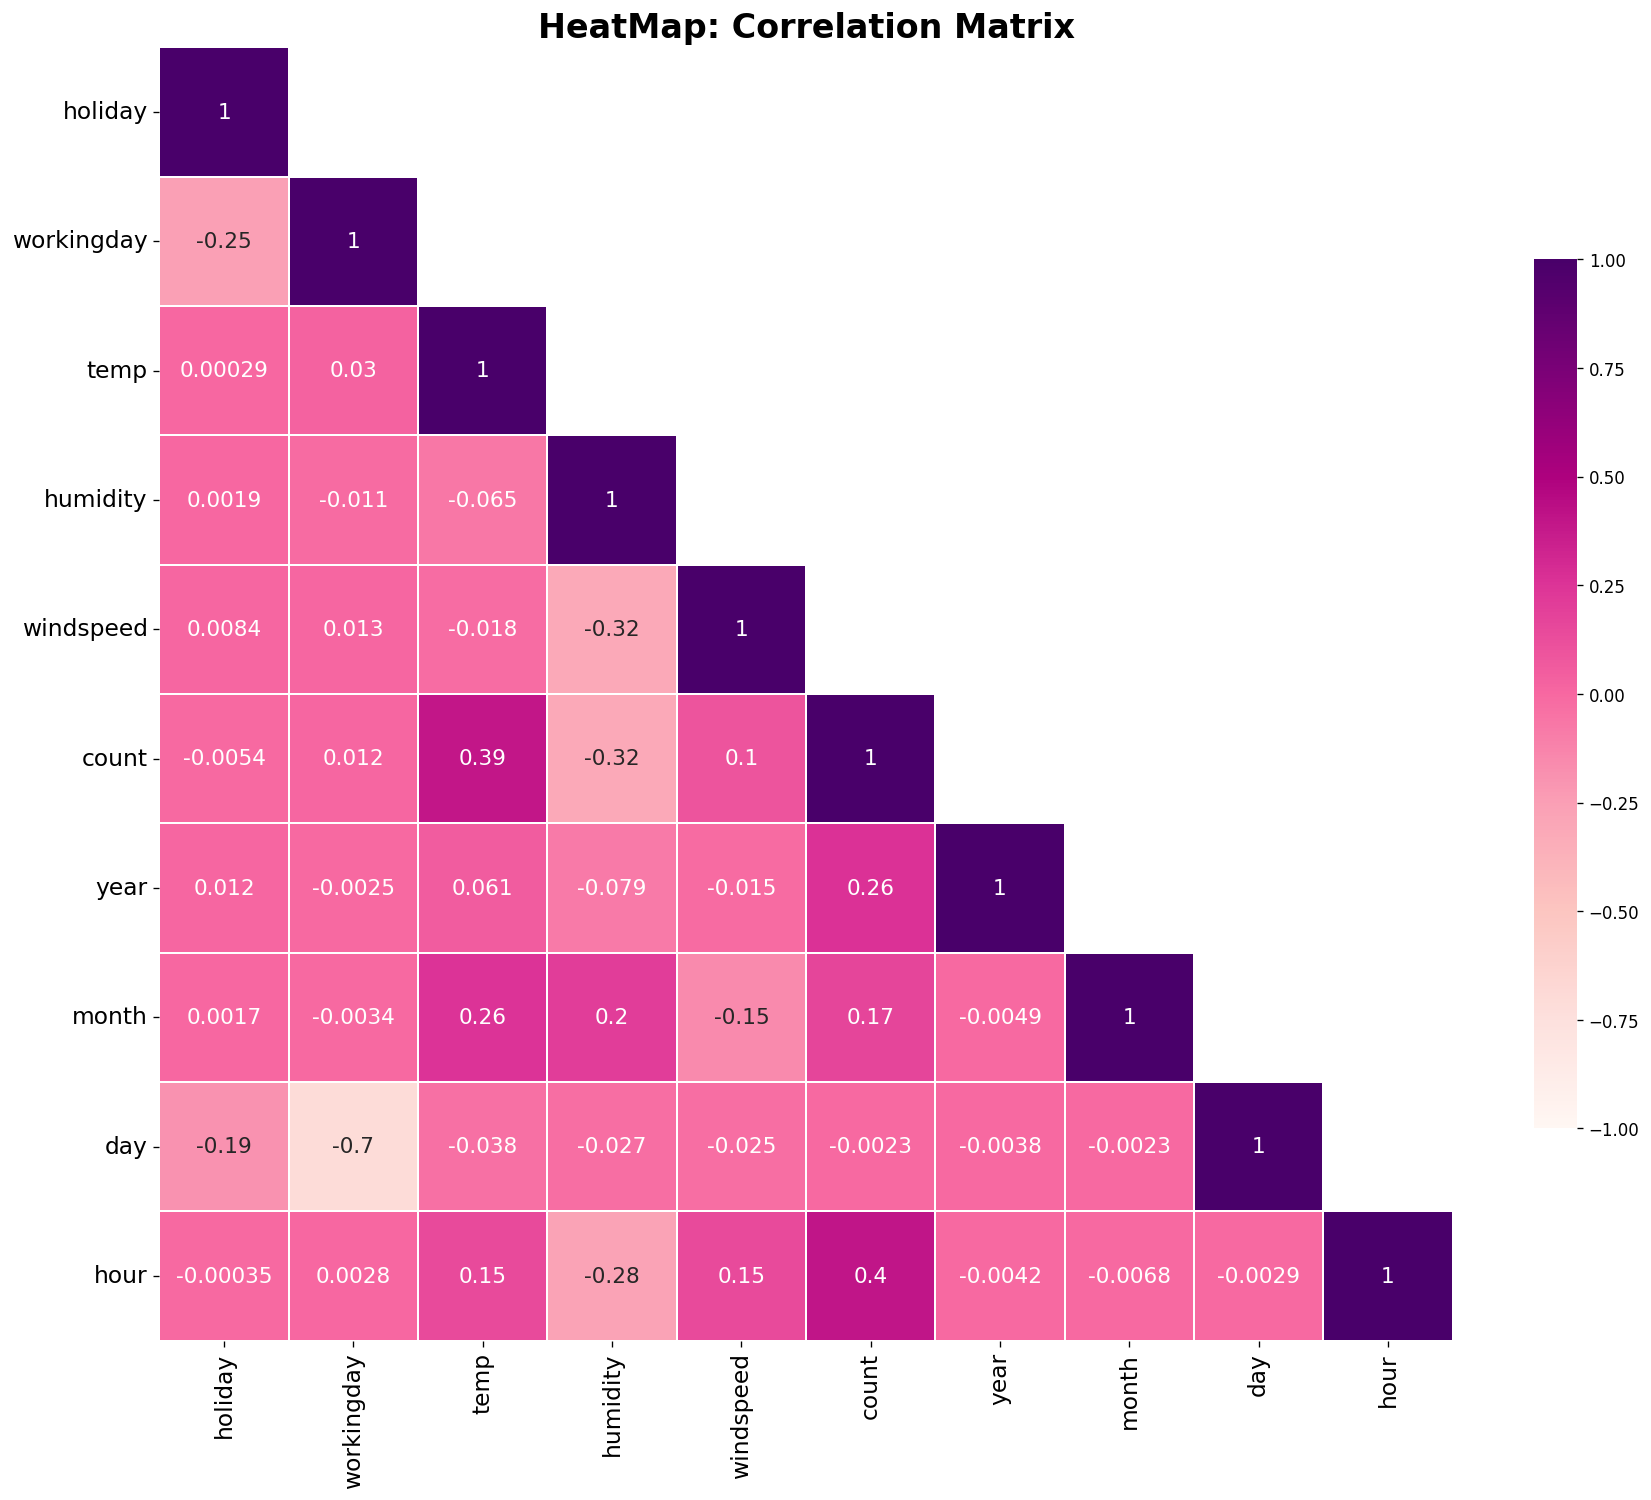

In [ ]:
## Let's check the correlation between these variables to see if there is pattern between variables
# Recheck: Plotting a heatmap to understand the correlation between the independent variables

# Ignoring 'casual' and 'registered' features
import seaborn as sns
feature_numeric = [i for i in train.columns if i not in ['casual', 'registered']]
plt.figure(figsize = (15,15), dpi=120)
corr_data = train.copy()
corr_matrix = corr_data[feature_numeric].corr()

f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=120)
# Create a mask to eliminate redundant repetitive correlations
corr_mask = np.array(corr_matrix)
corr_mask[np.tril_indices_from(corr_mask)] = False

# Plot heatmap using correlation matrix and mask
ax_corr1 = sns.heatmap(corr_matrix, cmap= 'RdPu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, mask=corr_mask, annot=True, linewidths=0.01, annot_kws={"size":13})
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)
plt.title("HeatMap: Correlation Matrix", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.autoscale()
plt.show()

**Observation:**<br>
From the above correlation matrix, we can conclude that multicollinearity is reduced from the dataset.

## <span style="color:blue">Step 5: Rerun the model with the same settings as before, just with more features</span>

In [ ]:
# Requirements: (Same settings as that of initial run) For AutoGluon's Tabular Predictions
eval_metric = 'root_mean_squared_error'
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 60*10 = 600 seconds
presets = "best_quality"                     # auto_stack=True

In [ ]:
predictor_new_features = TabularPredictor(label=label,
                                          problem_type= 'regression',
                                          eval_metric=eval_metric,
                                          learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                                           train_data = train_data,
                                                                                           time_limit=time_limit,
                                                                                           presets=presets)

No path specified. Models will be saved in: "AutogluonModels/ag-20230101_021529/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230101_021529/"
AutoGluon Version:  0.6.1
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2330.73 MB
	Train Data (Original)  Memory Usage: 0.82 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features

In [ ]:
# # Uncomment to load a previously trained model

# predictor_new_features = TabularPredictor.load("AutogluonModels/ag-20230101_021529/")

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -37.980017       2.468887  36.311075                0.000879           0.186851            3       True          8
1    ExtraTreesMSE_BAG_L2  -38.000747       1.876896  18.739031                0.574730           6.608762            2       True          7
2     WeightedEnsemble_L2  -38.153596       1.096397  12.399406                0.000789           0.311148            2       True          5
3    ExtraTreesMSE_BAG_L1  -38.555706       0.552747   4.246474                0.552747           4.246474            1       True          4
4  RandomForestMSE_BAG_L2  -38.723767       1.893278  29.515462                0.591113          17.385193            2       True          6
5  RandomForestMSE_BAG_L1  -39.726546       0.542861   7.841784                0.54286

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -113.26164315463612,
  'KNeighborsDist_BAG_L1': -109.84517207130654,
  'RandomForestMSE_BAG_L1': -39.72654615808394,
  'ExtraTreesMSE_BAG_L1': -38.55570595612451,
  'WeightedEnsemble_L2': -38.15359622776298,
  'RandomForestMSE_BAG_L2': -38.72376744603479,
  'ExtraTreesMSE_BAG_L2': -38.00074658460099,
  'WeightedEnsemble_L3': -37.98001709650877},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'KNeighborsUnif_BAG_L1': 'AutogluonModels/ag-20230101_021529/models/KNeighborsUnif_BAG_L1/',
  'KNeighborsD

In [ ]:
# Leaderboard dataframe
leaderboard_new_features_df = pd.DataFrame(predictor_new_features.leaderboard(silent=True))
leaderboard_new_features_df

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-37.980017,2.468887,36.311075,0.000879,0.186851,3,True,8
1,ExtraTreesMSE_BAG_L2,-38.000747,1.876896,18.739031,0.574730,6.608762,2,True,7
2,WeightedEnsemble_L2,-38.153596,1.096397,12.399406,0.000789,0.311148,2,True,5
3,ExtraTreesMSE_BAG_L1,-38.555706,0.552747,4.246474,0.552747,4.246474,1,True,4
4,RandomForestMSE_BAG_L2,-38.723767,1.893278,29.515462,0.591113,17.385193,2,True,6
5,RandomForestMSE_BAG_L1,-39.726546,0.542861,7.841784,0.542861,7.841784,1,True,3
6,KNeighborsDist_BAG_L1,-109.845172,0.103683,0.021063,0.103683,0.021063,1,True,2
7,KNeighborsUnif_BAG_L1,-113.261643,0.102875,0.020948,0.102875,0.020948,1,True,1


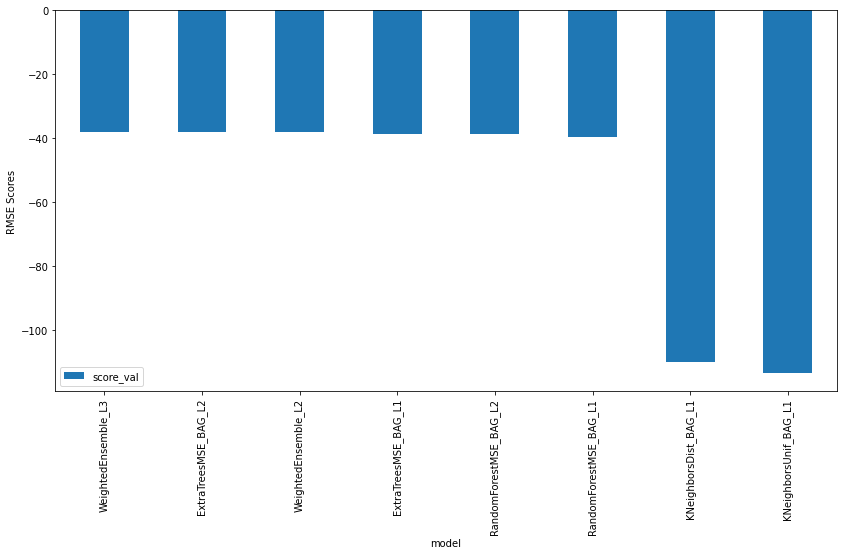

In [ ]:
# Output the model's `score_val` in a bar chart to compare performance
import matplotlib.pyplot as plt
leaderboard_new_features_df.plot(kind="bar", x="model", y="score_val", figsize=(14, 7))
plt.ylabel("RMSE Scores")
plt.show()

### <span style="color:Purple">Create predictions from test dataset

In [ ]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

0    9.845715
1    6.112857
2    3.130953
3    2.746667
4    2.616667
Name: count, dtype: float32

#### <span style="color:Purple">NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions_new_features` series to see if there are any negative values
predictions_new_features.describe()

count    6493.000000
mean      191.006577
std       174.610275
min         1.654286
25%        46.799046
50%       149.020950
75%       282.899536
max       912.321411
Name: count, dtype: float64

**Observations:**<br>Since the minimum value in predictions series is *1.654*, we can safely say that there are *no negative values* in the predictions.

In [ ]:
# How many negative values do we have?

# Rechecking the predictions in predictions_new_features
negative_pred_count = predictions_new_features.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions_new_features.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6493
Total negative prediction values : 0


**Observation:**<br>No negative values (i.e. zero negative values) in the predictions.

In [ ]:
# Remember to set all negative values to zero
predictions_new_features[predictions_new_features<0] = 0    # (In case, if negative values exist in the predictions_new_features, set them to 0)

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions_new_features.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


**Observation:**<br>No need to set them to zero as no negative values are present in the predictions.

### <span style="color:Purple">Set predictions to submission dataframe, save, and submit

In [ ]:
# Same thing as train and test dataset
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
# Same submitting predictions
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 367kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 4

fileName                     date                 description                             status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-01-01 02:16:26  new features                            complete  0.44798      0.44798       
submission.csv               2023-01-01 02:13:14  first raw submission                    complete  1.84484      1.84484       
tail: write error: Broken pipe


#### New Score of `0.44798`

## <span style="color:blue">Step 6: Hyper parameter optimization</span>
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
# Requirements: (Same settings as initial run) For AutoGluon's Tabular Predictions
eval_metric = 'root_mean_squared_error'
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 60*10 = 600 seconds
presets = "optimize_for_deployment"

In [ ]:
import autogluon.core as ag
## From autogluon documentation

nn_options = {'num_epochs': 5,
              'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),
                    # learning rate used in training (real-valued hyperparameter searched on log-scale)
              'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),
                    # activation function used in NN (categorical hyperparameter, default = first entry)
              'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1)}

gbm_options = [{'extra_trees': True,
                'num_boost_round': ag.space.Int(lower=100, upper=500, default=100),
                'num_leaves': ag.space.Int(lower=25, upper=64, default=36),
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,
                  }

num_trials = 20            # Number of hyperparameter optimization trials you want to perform
search_strategy = 'auto'  # tune hyperparameters using Bayesian optimization routine with a local scheduler
scheduler = 'local'       # Local FIFO scheduler

hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler' : scheduler,
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error',
                                    learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                         train_data=train,
                                                                         time_limit=time_limit,
                                                                         presets=presets,
                                                                         hyperparameters=hyperparameters,
                                                                         hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                         refit_full='best')

No path specified. Models will be saved in: "AutogluonModels/ag-20230101_021628/"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230101_021628/"
AutoGluon Version:  0.6.1
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2292.46 MB
	Train Data (Original)  Memory Usage: 0.82 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 3 

[1000]	valid_set's rmse: 38.8412


 10%|█         | 2/20 [00:03<00:33,  1.84s/it]

[1000]	valid_set's rmse: 39.722


 15%|█▌        | 3/20 [00:06<00:38,  2.26s/it]

[1000]	valid_set's rmse: 39.5199
[2000]	valid_set's rmse: 38.3691
[3000]	valid_set's rmse: 38.1532
[4000]	valid_set's rmse: 38.1416
[5000]	valid_set's rmse: 38.1845


 25%|██▌       | 5/20 [00:21<01:13,  4.91s/it]

[1000]	valid_set's rmse: 39.0485


 40%|████      | 8/20 [00:29<00:37,  3.13s/it]

[1000]	valid_set's rmse: 39.3696
[2000]	valid_set's rmse: 38.677
[3000]	valid_set's rmse: 38.6376


 50%|█████     | 10/20 [00:40<00:39,  3.93s/it]

[1000]	valid_set's rmse: 38.5283
[2000]	valid_set's rmse: 38.2386


 55%|█████▌    | 11/20 [00:47<00:42,  4.74s/it]

[1000]	valid_set's rmse: 39.1305
[2000]	valid_set's rmse: 38.5694
[3000]	valid_set's rmse: 38.5402
[4000]	valid_set's rmse: 38.4337
[5000]	valid_set's rmse: 38.4924


 60%|██████    | 12/20 [01:00<00:57,  7.22s/it]

[1000]	valid_set's rmse: 38.5145
[2000]	valid_set's rmse: 38.3808


 65%|██████▌   | 13/20 [01:06<00:48,  6.95s/it]

[1000]	valid_set's rmse: 40.8581
[2000]	valid_set's rmse: 39.9082
[3000]	valid_set's rmse: 39.509
[4000]	valid_set's rmse: 39.2621
[5000]	valid_set's rmse: 39.0913
[6000]	valid_set's rmse: 39.0335
[7000]	valid_set's rmse: 39.035
[8000]	valid_set's rmse: 39.07


 70%|███████   | 14/20 [01:15<00:45,  7.56s/it]

[1000]	valid_set's rmse: 43.5792
[2000]	valid_set's rmse: 41.0624
[3000]	valid_set's rmse: 40.4767
[4000]	valid_set's rmse: 40.1254
[5000]	valid_set's rmse: 39.8106
[6000]	valid_set's rmse: 39.4772
[7000]	valid_set's rmse: 39.3907
[8000]	valid_set's rmse: 39.3071
[9000]	valid_set's rmse: 39.2591
[10000]	valid_set's rmse: 39.261


 75%|███████▌  | 15/20 [01:30<00:48,  9.74s/it]

[1000]	valid_set's rmse: 38.7255
[2000]	valid_set's rmse: 38.0862
[3000]	valid_set's rmse: 37.9813
[4000]	valid_set's rmse: 37.8941
[5000]	valid_set's rmse: 37.8529
[6000]	valid_set's rmse: 37.8765


 80%|████████  | 16/20 [01:44<00:45, 11.29s/it]

[1000]	valid_set's rmse: 39.6891
[2000]	valid_set's rmse: 38.345
[3000]	valid_set's rmse: 38.1111
[4000]	valid_set's rmse: 38.0233
[5000]	valid_set's rmse: 38.1016


 85%|████████▌ | 17/20 [01:58<00:35, 11.83s/it]

[1000]	valid_set's rmse: 39.7014
[2000]	valid_set's rmse: 39.6662


 90%|█████████ | 18/20 [02:00<00:18,  9.01s/it]

[1000]	valid_set's rmse: 38.9049
[2000]	valid_set's rmse: 38.47


 95%|█████████▌| 19/20 [02:03<00:07,  7.24s/it]

[1000]	valid_set's rmse: 39.0219
[2000]	valid_set's rmse: 38.7435


100%|██████████| 20/20 [02:07<00:00,  6.35s/it]
Fitted model: LightGBM/T1 ...
	-38.7749	 = Validation score   (-root_mean_squared_error)
	1.8s	 = Training   runtime
	0.16s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	-39.278	 = Validation score   (-root_mean_squared_error)
	1.32s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: LightGBM/T3 ...
	-39.6569	 = Validation score   (-root_mean_squared_error)
	2.24s	 = Training   runtime
	0.21s	 = Validation runtime
Fitted model: LightGBM/T4 ...
	-38.124	 = Validation score   (-root_mean_squared_error)
	10.77s	 = Training   runtime
	0.95s	 = Validation runtime
Fitted model: LightGBM/T5 ...
	-39.5392	 = Validation score   (-root_mean_squared_error)
	1.5s	 = Training   runtime
	0.1s	 = Validation runtime
Fitted model: LightGBM/T6 ...
	-39.0408	 = Validation score   (-root_mean_squared_error)
	3.55s	 = Training   runtime
	0.24s	 = Validation runtime
Fitted model: LightGBM/T7 ...
	-38.6204	 = Validation score   (-root_mean_

In [ ]:
# # Uncomment to load a previously trained model

# predictor_new_hpo = TabularPredictor.load("AutogluonModels/ag-20230101_021628/")

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -37.433966       2.265074  25.139902                0.000577           0.270026            2       True          4
1         LightGBM/T16 -37.844296       1.147162  11.832927                1.147162          11.832927            1       True          1
2         LightGBM/T17 -38.014973       0.896015  10.516627                0.896015          10.516627            1       True          2
3         LightGBM/T19 -38.335105       0.221320   2.520322                0.221320           2.520322            1       True          3
Number of models trained: 4
Types of models trained:
{'LGBModel', 'WeightedEnsembleModel'}
Bagging used: False 
Multi-layer stack-ensembling used: False 
Feature Metadata (Processed):
(raw dtype, special dtypes):
('category', [])  : 3 | ['season', 

{'model_types': {'LightGBM/T16': 'LGBModel',
  'LightGBM/T17': 'LGBModel',
  'LightGBM/T19': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T16': -37.8442961045261,
  'LightGBM/T17': -38.014972867702795,
  'LightGBM/T19': -38.33510529056697,
  'WeightedEnsemble_L2': -37.43396557587345},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T16': '/root/cd0385-project-starter/project/AutogluonModels/ag-20230101_021628/models/LightGBM/T16/',
  'LightGBM/T17': '/root/cd0385-project-starter/project/AutogluonModels/ag-20230101_021628/models/LightGBM/T17/',
  'LightGBM/T19': '/root/cd0385-project-starter/project/AutogluonModels/ag-20230101_021628/models/LightGBM/T19/',
  'WeightedEnsemble_L2': 'AutogluonModels/ag-20230101_021628/models/WeightedEnsemble_L2/'},
 'model_fit_times': {'LightGBM/T16': 11.832926988601685,
  'LightGBM/T17': 10.516627311706543,
  'LightGBM/T19': 2.520321846008301,
  'WeightedEnsemble_L2': 0.27002596855163574

In [ ]:
# Leaderboard dataframe
leaderboard_new_hpo_df = pd.DataFrame(predictor_new_hpo.leaderboard(silent=True))
leaderboard_new_hpo_df

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-37.433966,2.265074,25.139902,0.000577,0.270026,2,True,4
1,LightGBM/T16,-37.844296,1.147162,11.832927,1.147162,11.832927,1,True,1
2,LightGBM/T17,-38.014973,0.896015,10.516627,0.896015,10.516627,1,True,2
3,LightGBM/T19,-38.335105,0.221320,2.520322,0.221320,2.520322,1,True,3


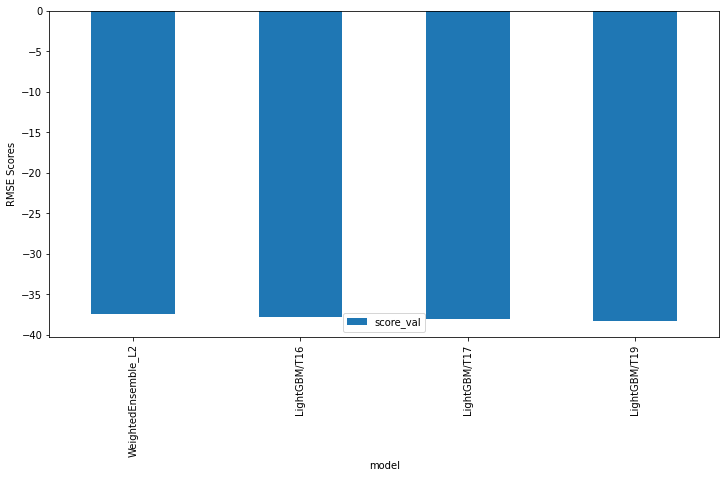

In [ ]:
# Output the model's `score_val` in a bar chart to compare performance
import matplotlib.pyplot as plt
leaderboard_new_hpo_df.plot(kind="bar", x="model", y="score_val", figsize=(12, 6))
plt.ylabel("RMSE Scores")
plt.show()

### <span style="color:Purple">Create predictions from test dataset

In [ ]:
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo.head()

0    20.248280
1     3.000067
2     1.448200
3     2.160984
4     2.098033
Name: count, dtype: float32

#### <span style="color:Purple">NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions_new_hpo` series to see if there are any negative values
predictions_new_hpo.describe()

count    6493.000000
mean      190.091919
std       174.652771
min       -26.579716
25%        45.561981
50%       147.740143
75%       283.975952
max       940.816101
Name: count, dtype: float64

**Observations:**<br>Since the minimum value in predictions series is *(-26.58)*, we do have *negative values* in the predictions.

In [ ]:
# How many negative values do we have?

# Rechecking the predictions in predictions_new_hpo
negative_pred_count = predictions_new_hpo.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions_new_hpo.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6390
Total negative prediction values : 103


**Observation:**<br>There are *103* negative values in the predictions.

In [ ]:
# Remember to set all negative values to zero
predictions_new_hpo[predictions_new_hpo<0] = 0    # (In case, if negative values exist in the predictions_new_hpo, set them to 0)

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions_new_hpo.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


**Observation:**<br>All negative values in the predictions are set to zero.

### <span style="color:Purple">Set predictions to submission dataframe, save, and submit

In [ ]:
# Same thing as train and test dataset
submission_new_hpo = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
# Same submitting predictions
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 346kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 5

fileName                     date                 description                             status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-01-01 02:20:05  new features with hyperparameters       complete  0.54914      0.54914       
submission_new_features.csv  2023-01-01 02:16:26  new features                            complete  0.44798      0.44798       
submission.csv               2023-01-01 02:13:14  first raw submission                    complete  1.84484      1.84484       
tail: write error: Broken pipe


#### New Score of `0.54914`

## <span style="color:blue">Step 6_1: Hyper parameter optimization</span>

**NOTE:**<br>
1. Since, autogluon hyperparameter optimization (in the Step 6) doesn\'t rank neural networks [NN_TORCH] among the list of top models, we can exclude them.
2. Considering GBM, XT and XGB model types (as these along with WeightedEnsembles have shown good results)

In [ ]:
# Requirements: (Same settings as initial run) For AutoGluon's Tabular Predictions
eval_metric = 'root_mean_squared_error'
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 600 seconds
presets = "optimize_for_deployment"          # Lighter preset options (faster)

In [ ]:
import autogluon.core as ag
## From autogluon documentation:

# Exclude ['NN_TORCH'] family of models
excluded_model_types = ['NN_TORCH']


# Considering GBM, XT and XGB model types (as these along with WeightedEnsembles have shown good results)
# For GBM
gbm_options = [{'extra_trees': True,
                'num_boost_round': ag.space.Int(lower=100, upper=800, default=100),
                'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']

# XT Models
xt_options = {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}}

# XGB Models
xgb_options = [{'objective': 'reg:squarederror', # 'reg:linear' is deprecated
                'eval_metric': 'rmse',
                'max_depth':ag.space.Int(lower=5, upper=8, default=6),
                'n_estimators': ag.space.Int(lower=100, upper=500, default=100),
                'eta':.3,
                'subsample': 1,
                'colsample_bytree': 1}]

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'XT': xt_options,
                   'XGB': xgb_options
                  }

num_trials = 20            # Number of hyperparameter optimization trials you want to perform
search_strategy = 'auto'  # tune hyperparameters using Bayesian optimization routine with a local scheduler
scheduler = 'local'       # Local FIFO scheduler

hyperparameter_tune_kwargs = {
                            'num_trials': num_trials,
                            'scheduler' : scheduler,
                            'searcher': search_strategy,
                        }

predictor_new_hpo1 = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error',
                                    learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                         train_data=train,
                                                                         time_limit=time_limit,
                                                                         presets=presets,
                                                                         hyperparameters=hyperparameters,
                                                                         hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                         excluded_model_types=excluded_model_types,
                                                                         refit_full='best')

No path specified. Models will be saved in: "AutogluonModels/ag-20230101_022006/"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230101_022006/"
AutoGluon Version:  0.6.1
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2294.52 MB
	Train Data (Original)  Memory Usage: 0.82 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 3 

[1000]	valid_set's rmse: 38.8412


 10%|█         | 2/20 [00:03<00:32,  1.82s/it]

[1000]	valid_set's rmse: 39.722


 15%|█▌        | 3/20 [00:06<00:38,  2.24s/it]

[1000]	valid_set's rmse: 39.5199
[2000]	valid_set's rmse: 38.3691
[3000]	valid_set's rmse: 38.1532
[4000]	valid_set's rmse: 38.1416
[5000]	valid_set's rmse: 38.1845


 25%|██▌       | 5/20 [00:21<01:12,  4.84s/it]

[1000]	valid_set's rmse: 39.0485


 40%|████      | 8/20 [00:29<00:37,  3.10s/it]

[1000]	valid_set's rmse: 39.3696
[2000]	valid_set's rmse: 38.677
[3000]	valid_set's rmse: 38.6376


 50%|█████     | 10/20 [00:39<00:38,  3.84s/it]

[1000]	valid_set's rmse: 38.5283
[2000]	valid_set's rmse: 38.2386


 55%|█████▌    | 11/20 [00:46<00:41,  4.61s/it]

[1000]	valid_set's rmse: 39.1305
[2000]	valid_set's rmse: 38.5694
[3000]	valid_set's rmse: 38.5402
[4000]	valid_set's rmse: 38.4337
[5000]	valid_set's rmse: 38.4924


 60%|██████    | 12/20 [00:59<00:57,  7.13s/it]

[1000]	valid_set's rmse: 38.5145
[2000]	valid_set's rmse: 38.3808


 65%|██████▌   | 13/20 [01:05<00:47,  6.83s/it]

[1000]	valid_set's rmse: 40.8581
[2000]	valid_set's rmse: 39.9082
[3000]	valid_set's rmse: 39.509
[4000]	valid_set's rmse: 39.2621
[5000]	valid_set's rmse: 39.0913
[6000]	valid_set's rmse: 39.0335
[7000]	valid_set's rmse: 39.035
[8000]	valid_set's rmse: 39.07


 70%|███████   | 14/20 [01:13<00:44,  7.36s/it]

[1000]	valid_set's rmse: 43.5792
[2000]	valid_set's rmse: 41.0624
[3000]	valid_set's rmse: 40.4767
[4000]	valid_set's rmse: 40.1254
[5000]	valid_set's rmse: 39.8106
[6000]	valid_set's rmse: 39.4772
[7000]	valid_set's rmse: 39.3907
[8000]	valid_set's rmse: 39.3071
[9000]	valid_set's rmse: 39.2591
[10000]	valid_set's rmse: 39.261


 75%|███████▌  | 15/20 [01:28<00:47,  9.46s/it]

[1000]	valid_set's rmse: 38.7255
[2000]	valid_set's rmse: 38.0862
[3000]	valid_set's rmse: 37.9813
[4000]	valid_set's rmse: 37.8941
[5000]	valid_set's rmse: 37.8529
[6000]	valid_set's rmse: 37.8765


	Stopping HPO to satisfy time limit...
 75%|███████▌  | 15/20 [01:43<00:34,  6.88s/it]
Fitted model: LightGBM/T1 ...
	-38.7749	 = Validation score   (-root_mean_squared_error)
	1.81s	 = Training   runtime
	0.15s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	-39.278	 = Validation score   (-root_mean_squared_error)
	1.31s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: LightGBM/T3 ...
	-39.6569	 = Validation score   (-root_mean_squared_error)
	2.25s	 = Training   runtime
	0.18s	 = Validation runtime
Fitted model: LightGBM/T4 ...
	-38.124	 = Validation score   (-root_mean_squared_error)
	10.66s	 = Training   runtime
	0.88s	 = Validation runtime
Fitted model: LightGBM/T5 ...
	-39.5392	 = Validation score   (-root_mean_squared_error)
	1.49s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: LightGBM/T6 ...
	-39.0408	 = Validation score   (-root_mean_squared_error)
	3.51s	 = Training   runtime
	0.23s	 = Validation runtime
Fitted model: LightGBM/T7 ...
	-

In [ ]:
# # Uncomment to load a previously trained model

# predictor_new_hpo1 = TabularPredictor.load("AutogluonModels/ag-20230101_022006/")

In [ ]:
predictor_new_hpo1.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -37.271835       3.074989  36.949135                0.000599           0.512360            2       True          7
1         LightGBM/T16 -37.844296       1.103436  12.080250                1.103436          12.080250            1       True          3
2         LightGBM/T13 -38.369670       0.355586   4.966013                0.355586           4.966013            1       True          2
3         LightGBM/T12 -38.431862       1.015015  10.426404                1.015015          10.426404            1       True          1
4          XGBoost/T19 -38.740239       0.046255   1.808722                0.046255           1.808722            1       True          6
5           XGBoost/T8 -39.384803       0.068142   3.724757                0.068142           3.724757        

{'model_types': {'LightGBM/T12': 'LGBModel',
  'LightGBM/T13': 'LGBModel',
  'LightGBM/T16': 'LGBModel',
  'ExtraTreesMSE': 'XTModel',
  'XGBoost/T8': 'XGBoostModel',
  'XGBoost/T19': 'XGBoostModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T12': -38.431861570431245,
  'LightGBM/T13': -38.3696701247306,
  'LightGBM/T16': -37.8442961045261,
  'ExtraTreesMSE': -39.611729755198176,
  'XGBoost/T8': -39.38480317646934,
  'XGBoost/T19': -38.7402388682388,
  'WeightedEnsemble_L2': -37.27183530394365},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T12': '/root/cd0385-project-starter/project/AutogluonModels/ag-20230101_022006/models/LightGBM/T12/',
  'LightGBM/T13': '/root/cd0385-project-starter/project/AutogluonModels/ag-20230101_022006/models/LightGBM/T13/',
  'LightGBM/T16': '/root/cd0385-project-starter/project/AutogluonModels/ag-20230101_022006/models/LightGBM/T16/',
  'ExtraTreesMSE': 'AutogluonModels/ag-20230101_022006/models/

In [ ]:
# Leaderboard dataframe
leaderboard_new_hpo1_df = pd.DataFrame(predictor_new_hpo1.leaderboard(silent=True))
leaderboard_new_hpo1_df

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-37.271835,3.074989,36.949135,0.000599,0.512360,2,True,7
1,LightGBM/T16,-37.844296,1.103436,12.080250,1.103436,12.080250,1,True,3
2,LightGBM/T13,-38.369670,0.355586,4.966013,0.355586,4.966013,1,True,2
3,LightGBM/T12,-38.431862,1.015015,10.426404,1.015015,10.426404,1,True,1
4,XGBoost/T19,-38.740239,0.046255,1.808722,0.046255,1.808722,1,True,6
5,XGBoost/T8,-39.384803,0.068142,3.724757,0.068142,3.724757,1,True,5
6,ExtraTreesMSE,-39.611730,0.485954,3.430629,0.485954,3.430629,1,True,4


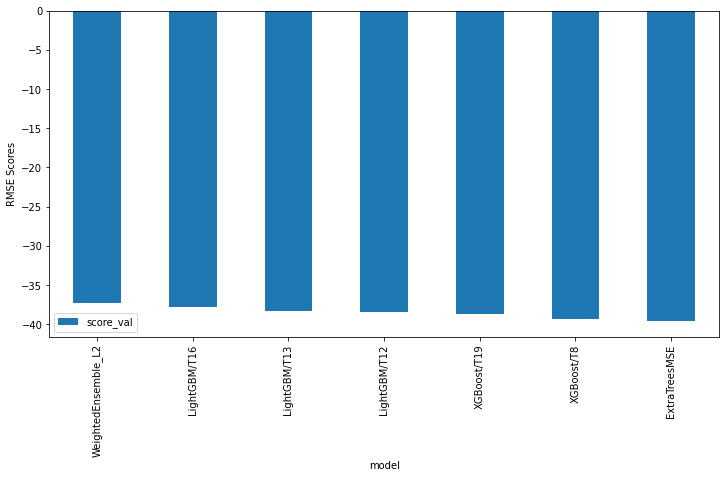

In [ ]:
# Output the model's `score_val` in a bar chart to compare performance
import matplotlib.pyplot as plt
leaderboard_new_hpo1_df.plot(kind="bar", x="model", y="score_val", figsize=(12, 6))
plt.ylabel("RMSE Scores")
plt.show()

## <span style="color:Purple">Create predictions from test dataset

In [ ]:
predictions_new_hpo1 = predictor_new_hpo1.predict(test)
predictions_new_hpo1.head()

0    17.182875
1     2.819565
2     1.131020
3     1.957309
4     1.986809
Name: count, dtype: float32

#### <span style="color:Purple">NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions_new_hpo1` series to see if there are any negative values
predictions_new_hpo1.describe()

count    6493.000000
mean      190.436356
std       173.619736
min       -17.049788
25%        47.120209
50%       148.872910
75%       284.133179
max       935.174316
Name: count, dtype: float64

**Observations:**<br>Since the minimum value in predictions series is *(-17.05)*, we do have *negative values* in the predictions.

In [ ]:
# How many negative values do we have?

# Rechecking the predictions in predictions_new_hpo1
negative_pred_count = predictions_new_hpo1.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions_new_hpo1.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6435
Total negative prediction values : 58


**Observation:**<br>There are *58* negative values in the predictions.

In [ ]:
# Remember to set all negative values to zero
predictions_new_hpo1[predictions_new_hpo1<0] = 0    # (In case, if negative values exist in the predictions_new_hpo1, set them to 0)

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions_new_hpo1.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No.of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No.of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


**Observation:**<br>All negative values in the predictions are set to zero.

### <span style="color:Purple">Set predictions to submission dataframe, save, and submit

In [ ]:
# Same thing as train and test dataset
submission_new_hpo1 = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo1.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
# Same submitting predictions
submission_new_hpo1["count"] = predictions_new_hpo1
submission_new_hpo1.to_csv("submission_new_hpo1.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo1.csv -m "new features with hyperparameters 1"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 400kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                            status    publicScore  privateScore  
---------------------------  -------------------  -------------------------------------  --------  -----------  ------------  
submission_new_hpo1.csv      2023-01-01 02:24:42  new features with hyperparameters 1    complete  0.50695      0.50695       
submission_new_hpo.csv       2023-01-01 02:20:05  new features with hyperparameters      complete  0.54914      0.54914       
submission_new_features.csv  2023-01-01 02:16:26  new features                           complete  0.44798      0.44798       
submission.csv               2023-01-01 02:13:14  first raw submission                   complete  1.84484      1.84484       
tail: write error: Broken pipe


#### New Score of `0.50695`

## <span style="color:blue">Step 6_2: Hyper parameter optimization</span>

**NOTE:**<br>
1. Since, autogluon hyperparameter optimization (in the Step 6) doesn\'t rank neural networks [NN_TORCH] among the list of top models, we can exclude them.
2. Considering GBM, XT, XGB, KNN and RF model types (as these along with WeightedEnsembles have shown good results in the past)

In [ ]:
# Requirements: (Same settings as initial run) For AutoGluon's Tabular Predictions
eval_metric = 'root_mean_squared_error'
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 600 seconds
presets = "optimize_for_deployment"

In [ ]:
import autogluon.core as ag
## From autogluon documentation

# Exclude ['NN_TORCH'] family of models
excluded_model_types = ['NN_TORCH']


# Considering GBM, XT, XGB, KNN and RF model types (as these along with WeightedEnsembles have shown good results in the past)
# For GBM
gbm_options = [{'extra_trees': True,
                'num_boost_round': ag.space.Int(lower=100, upper=800, default=100),
                'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']
# XT Models
xt_options = {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}}
# XGB Models
xgb_options = [{'objective': 'reg:squarederror', # 'reg:linear' is deprecated
                'eval_metric': 'rmse',
                'max_depth':ag.space.Int(lower=5, upper=8, default=6),
                'n_estimators': ag.space.Int(lower=100, upper=500, default=100),
                'eta':.3,
                'subsample': 1,
                'colsample_bytree': 1}]
# Random Forest Models
rf_options = {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}}
# KNN
knn_options = [{'weights': 'uniform', 'ag_args': {'name_suffix': 'Uniform'}},
               {'weights': 'distance', 'ag_args': {'name_suffix': 'Distance'}}]  # default

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'KNN': knn_options,
                   'XT': xt_options,
                   'XGB': xgb_options,
                   'RF': rf_options
                  }


num_trials = 20            # Number of hyperparameter optimization trials you want to perform
search_strategy = 'auto'  # tune hyperparameters using Bayesian optimization routine with a local scheduler
scheduler = 'local'       # Local FIFO scheduler

hyperparameter_tune_kwargs = {
                            'num_trials': num_trials,
                            'scheduler' : scheduler,
                            'searcher': search_strategy,
                        }


predictor_new_hpo2 = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error',
                                    learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                         train_data=train,
                                                                         time_limit=time_limit,
                                                                         presets=presets,
                                                                         hyperparameters=hyperparameters,
                                                                         hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                         excluded_model_types=excluded_model_types,
                                                                         refit_full='best')

No path specified. Models will be saved in: "AutogluonModels/ag-20230101_022444/"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230101_022444/"
AutoGluon Version:  0.6.1
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2364.92 MB
	Train Data (Original)  Memory Usage: 0.82 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 3 

[1000]	valid_set's rmse: 38.8412


 10%|█         | 2/20 [00:03<00:32,  1.83s/it]

[1000]	valid_set's rmse: 39.722


 15%|█▌        | 3/20 [00:06<00:38,  2.25s/it]

[1000]	valid_set's rmse: 39.5199
[2000]	valid_set's rmse: 38.3691
[3000]	valid_set's rmse: 38.1532
[4000]	valid_set's rmse: 38.1416
[5000]	valid_set's rmse: 38.1845


 25%|██▌       | 5/20 [00:21<01:12,  4.80s/it]

[1000]	valid_set's rmse: 39.0485


 40%|████      | 8/20 [00:29<00:37,  3.12s/it]

[1000]	valid_set's rmse: 39.3696
[2000]	valid_set's rmse: 38.677
[3000]	valid_set's rmse: 38.6376


 50%|█████     | 10/20 [00:39<00:38,  3.86s/it]

[1000]	valid_set's rmse: 38.5283
[2000]	valid_set's rmse: 38.2386


 55%|█████▌    | 11/20 [00:46<00:41,  4.66s/it]

[1000]	valid_set's rmse: 39.1305
[2000]	valid_set's rmse: 38.5694
[3000]	valid_set's rmse: 38.5402
[4000]	valid_set's rmse: 38.4337
[5000]	valid_set's rmse: 38.4924


 60%|██████    | 12/20 [00:59<00:57,  7.21s/it]

[1000]	valid_set's rmse: 38.5145


	Ran out of time, early stopping on iteration 1425. Best iteration is:
	[1350]	valid_set's rmse: 38.4051
	Stopping HPO to satisfy time limit...
 60%|██████    | 12/20 [01:04<00:42,  5.34s/it]
Fitted model: LightGBM/T1 ...
	-38.7749	 = Validation score   (-root_mean_squared_error)
	1.81s	 = Training   runtime
	0.15s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	-39.278	 = Validation score   (-root_mean_squared_error)
	1.32s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: LightGBM/T3 ...
	-39.6569	 = Validation score   (-root_mean_squared_error)
	2.25s	 = Training   runtime
	0.19s	 = Validation runtime
Fitted model: LightGBM/T4 ...
	-38.124	 = Validation score   (-root_mean_squared_error)
	10.55s	 = Training   runtime
	0.91s	 = Validation runtime
Fitted model: LightGBM/T5 ...
	-39.5392	 = Validation score   (-root_mean_squared_error)
	1.44s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: LightGBM/T6 ...
	-39.0408	 = Validation score   (-root_mean_

In [ ]:
# # Uncomment to load a previously trained model

# predictor_new_hpo2 = TabularPredictor.load("AutogluonModels/ag-20230101_022444/")

In [ ]:
predictor_new_hpo2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -37.335253       2.919066  37.135720                0.000660           0.634506            2       True          8
1          LightGBM/T4 -38.124006       0.906916  10.548339                0.906916          10.548339            1       True          1
2         LightGBM/T13 -38.405143       0.294676   3.695710                0.294676           3.695710            1       True          3
3         LightGBM/T12 -38.431862       0.987063  10.615608                0.987063          10.615608            1       True          2
4        LightGBMLarge -38.516436       0.126617   2.731897                0.126617           2.731897            1       True          7
5          XGBoost/T19 -38.740239       0.042880   1.794124                0.042880           1.794124        

{'model_types': {'LightGBM/T4': 'LGBModel',
  'LightGBM/T12': 'LGBModel',
  'LightGBM/T13': 'LGBModel',
  'ExtraTreesMSE': 'XTModel',
  'XGBoost/T8': 'XGBoostModel',
  'XGBoost/T19': 'XGBoostModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T4': -38.12400606130618,
  'LightGBM/T12': -38.431861570431245,
  'LightGBM/T13': -38.40514251364956,
  'ExtraTreesMSE': -39.611729755198176,
  'XGBoost/T8': -39.38480317646934,
  'XGBoost/T19': -38.7402388682388,
  'LightGBMLarge': -38.51643622165731,
  'WeightedEnsemble_L2': -37.335253438668836},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T4': '/root/cd0385-project-starter/project/AutogluonModels/ag-20230101_022444/models/LightGBM/T4/',
  'LightGBM/T12': '/root/cd0385-project-starter/project/AutogluonModels/ag-20230101_022444/models/LightGBM/T12/',
  'LightGBM/T13': '/root/cd0385-project-starter/project/AutogluonModels/ag-20230101_022444/models/LightGBM/

In [ ]:
# Leaderboard dataframe
leaderboard_new_hpo2_df = pd.DataFrame(predictor_new_hpo2.leaderboard(silent=True))
leaderboard_new_hpo2_df

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-37.335253,2.919066,37.135720,0.000660,0.634506,2,True,8
1,LightGBM/T4,-38.124006,0.906916,10.548339,0.906916,10.548339,1,True,1
2,LightGBM/T13,-38.405143,0.294676,3.695710,0.294676,3.695710,1,True,3
3,LightGBM/T12,-38.431862,0.987063,10.615608,0.987063,10.615608,1,True,2
4,LightGBMLarge,-38.516436,0.126617,2.731897,0.126617,2.731897,1,True,7
5,XGBoost/T19,-38.740239,0.042880,1.794124,0.042880,1.794124,1,True,6
6,XGBoost/T8,-39.384803,0.067704,3.575674,0.067704,3.575674,1,True,5
7,ExtraTreesMSE,-39.611730,0.492550,3.539862,0.492550,3.539862,1,True,4


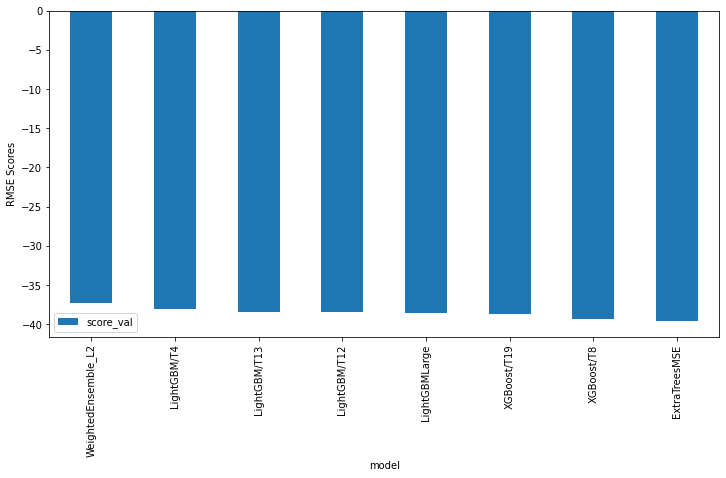

In [ ]:
# Output the model's `score_val` in a bar chart to compare performance
import matplotlib.pyplot as plt
leaderboard_new_hpo2_df.plot(kind="bar", x="model", y="score_val", figsize=(12, 6))
plt.ylabel("RMSE Scores")
plt.show()

### <span style="color:Purple">Create predictions from test dataset

In [ ]:
predictions_new_hpo2 = predictor_new_hpo2.predict(test)
predictions_new_hpo2.head()

0    16.104721
1     3.638688
2     1.740896
3     1.476243
4     1.483361
Name: count, dtype: float32

#### <span style="color:Purple">NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions_new_hpo2` series to see if there are any negative values
predictions_new_hpo2.describe()

count    6493.000000
mean      190.503357
std       173.598434
min       -12.343683
25%        46.889507
50%       149.750473
75%       284.056366
max       937.391357
Name: count, dtype: float64

**Observations:**<br>Since the minimum value in predictions series is *(-12.344)*, we do have *negative values* in the predictions.

In [ ]:
# How many negative values do we have?

# Rechecking the predictions in predictions_new_hpo2
negative_pred_count = predictions_new_hpo2.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions_new_hpo2.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6443
Total negative prediction values : 50


**Observation:**<br>There are *50* negative values in the predictions.

In [ ]:
# Remember to set all negative values to zero
predictions_new_hpo2[predictions_new_hpo2<0] = 0    # (In case, if negative values exist in the predictions_new_hpo2, set them to 0)

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions_new_hpo2.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


**Observation:**<br>All negative values in the predictions are set to zero.

### <span style="color:Purple">Set predictions to submission dataframe, save, and submit

In [ ]:
# Same thing as train and test dataset
submission_new_hpo2 = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo2.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
# Same submitting predictions
submission_new_hpo2["count"] = predictions_new_hpo2
submission_new_hpo2.to_csv("submission_new_hpo2.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo2.csv -m "new features with hyperparameters 2"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 322kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 7

fileName                     date                 description                            status    publicScore  privateScore  
---------------------------  -------------------  -------------------------------------  --------  -----------  ------------  
submission_new_hpo2.csv      2023-01-01 02:28:47  new features with hyperparameters 2    complete  0.49440      0.49440       
submission_new_hpo1.csv      2023-01-01 02:24:42  new features with hyperparameters 1    complete  0.50695      0.50695       
submission_new_hpo.csv       2023-01-01 02:20:05  new features with hyperparameters      complete  0.54914      0.54914       
submission_new_features.csv  2023-01-01 02:16:26  new features                           complete  0.44798      0.44798       
submission.csv               2023-01-01 02:13:14  first raw submission                   complete  1.84484      1.84484       
tail: write error: Broken pipe


#### New Score of `0.49440`

## <span style="color:blue">Step 7: Write a Report</span>
### <span style="color:green">Refer to the markdown file for the full report</span>
### <span style="color:Purple">Creating plots and table for report</span>

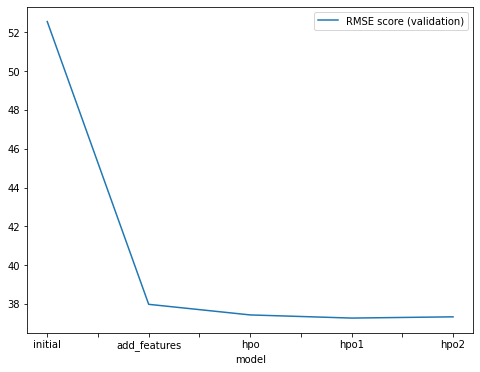

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo", "hpo1", "hpo2"],
        "RMSE score (validation)": [52.5564, 37.9800, 37.4340, 37.2718, 37.3353]  # Note: Actual RMSE values are considered
    }
).plot(x="model", y="RMSE score (validation)", figsize=(8, 6)).get_figure()
fig.savefig('img/model_train_score.png')

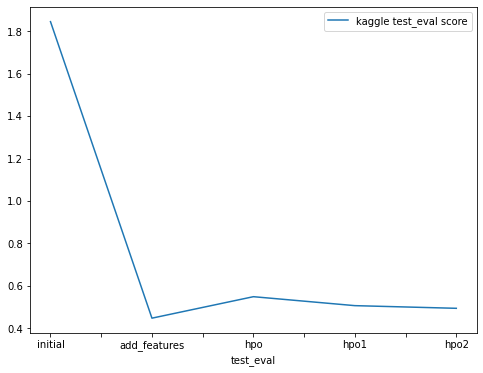

In [ ]:
# Take the 3 kaggle scores (or more) and create a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo", "hpo1", "hpo2"],
        "kaggle test_eval score": [1.84484, 0.44798, 0.54914, 0.50695, 0.49440]
    }
).plot(x="test_eval", y="kaggle test_eval score", figsize=(8, 6)).get_figure()
fig.savefig('img/model_test_score.png')

### <span style="color:Purple">Hyperparameter Table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result

# NOTE: Here the last 'hpo' based top-model is the 'hpo2' model with best Kaggle score within hyperparameter optimization category
pd.DataFrame({
    "model": ["initial", "add_features", "hpo (top-hpo-model: hpo2)"],
    "hpo1": ["prescribed_values", "prescribed_values", "Tree-Based Models: (GBM, XT, XGB & RF)"],
    "hpo2": ["prescribed_values", "prescribed_values", "KNN"],
    "hpo3": ["presets: 'high quality' (auto_stack=True)", "presets: 'high quality' (auto_stack=True)", "presets: 'optimize_for_deployment"],
    "score": [1.84484, 0.44798, 0.49440]
})

,model,hpo1,hpo2,hpo3,score
0,initial,prescribed_values,prescribed_values,presets: 'high quality' (auto_stack=True),1.84484
1,add_features,prescribed_values,prescribed_values,presets: 'high quality' (auto_stack=True),0.44798
2,hpo (top-hpo-model: hpo2),"Tree-Based Models: (GBM, XT, XGB & RF)",KNN,presets: 'optimize_for_deployment,0.49440


## <span style="color:green">Conclusion:

The `top-ranked model` was the `(add features) model` named `WeightedEnsemble_L3`, with a **validation RMSE score** of **37.9800** and the best **Kaggle score** of **0.44798 (on test dataset)**.